In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib as mpl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aaacopy-of-titanic/train.csv
/kaggle/input/aaacopy-of-titanic/test.csv
/kaggle/input/aaacopy-of-titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/aaacopy-of-titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

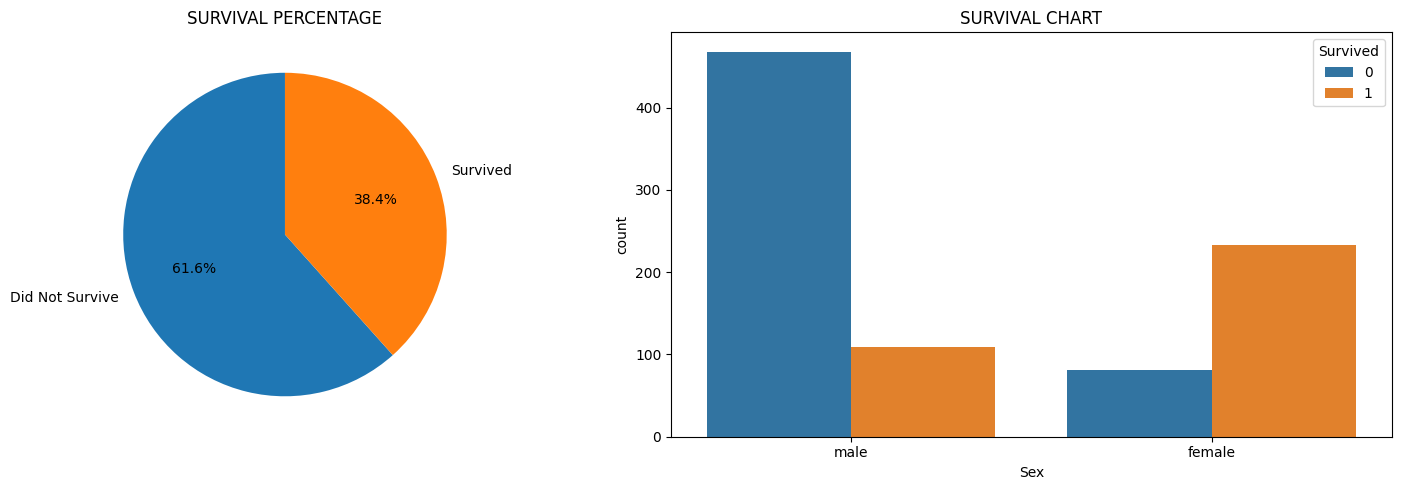

In [6]:
sur = df['Survived'].value_counts()
survival_rate = [sur[0]/len(df)*100,sur[1]/len(df)*100]
fig,ax = plt.subplots(nrows=1,ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
plt.pie(survival_rate,labels = ['Did Not Survive','Survived'],autopct='%1.1f%%',startangle = 90,)
plt.title('SURVIVAL PERCENTAGE')
plt.subplot(1,2,2)

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('SURVIVAL CHART')

# Show the plots
plt.tight_layout()
plt.show()

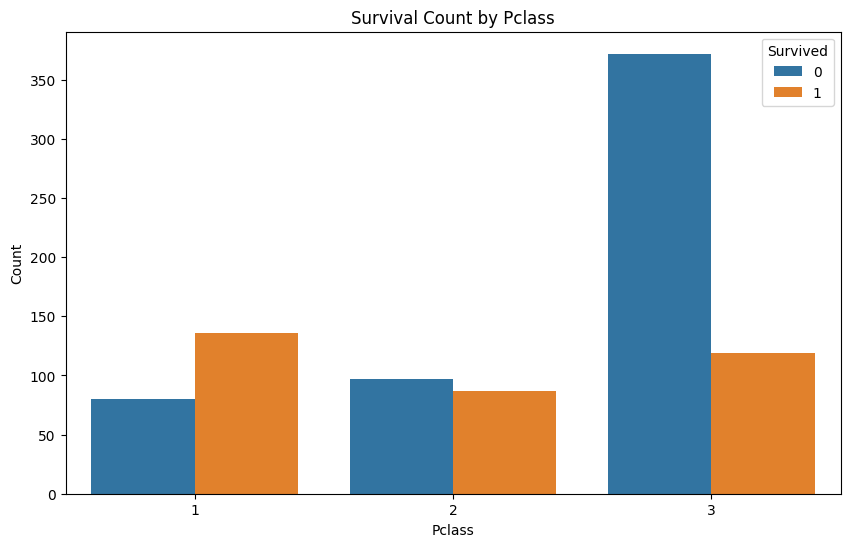

In [7]:
# Create a figure and axis object with a specified figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('SURVIVAL')

# Set labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Survival Count by Pclass')

# Show the plot
plt.show()

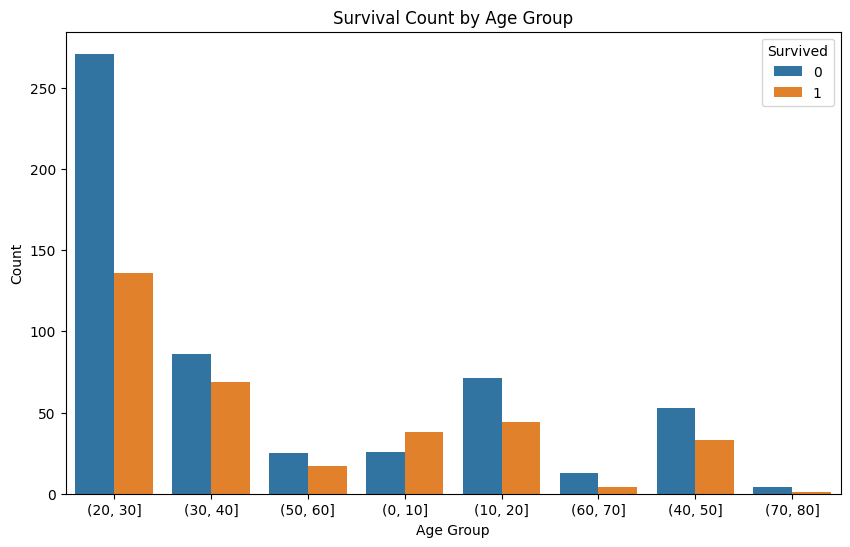

In [8]:
mean_age = df['Age'].mean()
df.fillna({'Age': mean_age}, inplace=True)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a new column 'AgeGroup' with age ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)



# Convert 'AgeGroup' column to strings
df['AgeGroup'] = df['AgeGroup'].astype(str)

# Set the figure size
plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='AgeGroup', hue='Survived', data=df)


# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')

# Show the plot
plt.show()

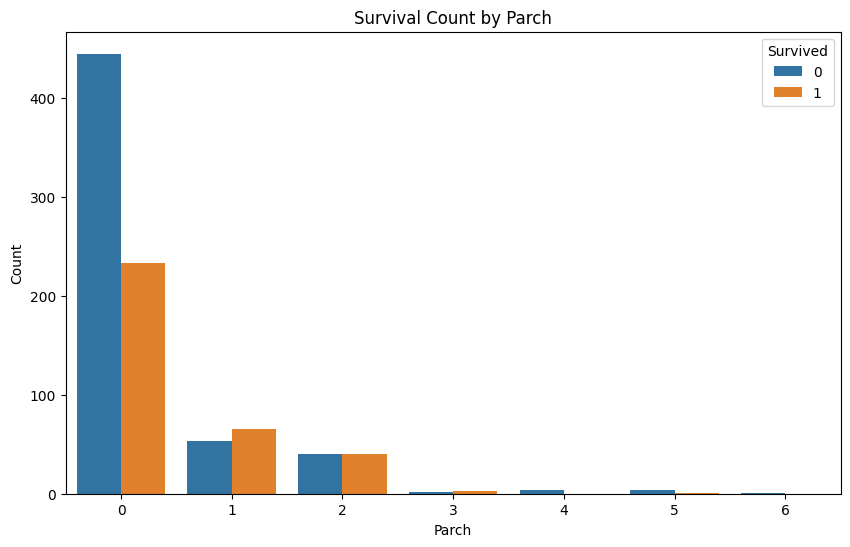

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('SURVIVAL')

# Set labels and title
ax.set_xlabel('Parch')
ax.set_ylabel('Count')
ax.set_title('Survival Count by Parch')

# Show the plot
plt.show()

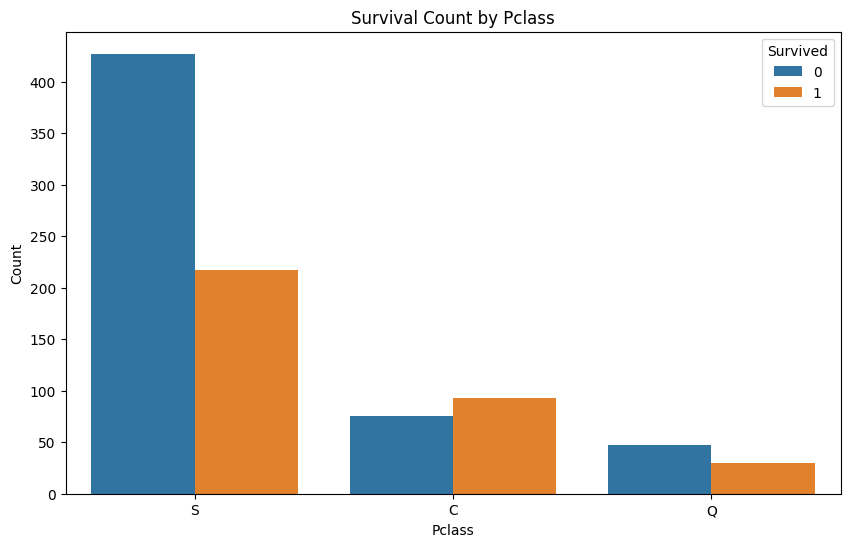

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='Embarked',hue='Survived', data=df)
plt.title('SURVIVAL')

# Set labels and title
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Survival Count by Pclass')

# Show the plot
plt.show()

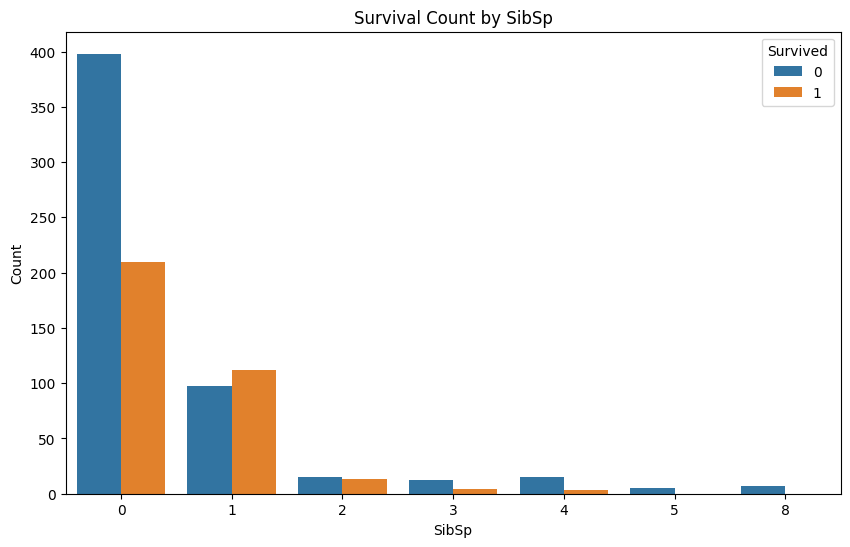

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='SibSp',hue='Survived', data=df)
plt.title('SURVIVAL')

# Set labels and title
ax.set_xlabel('SibSp')
ax.set_ylabel('Count')
ax.set_title('Survival Count by SibSp')

# Show the plot
plt.show()

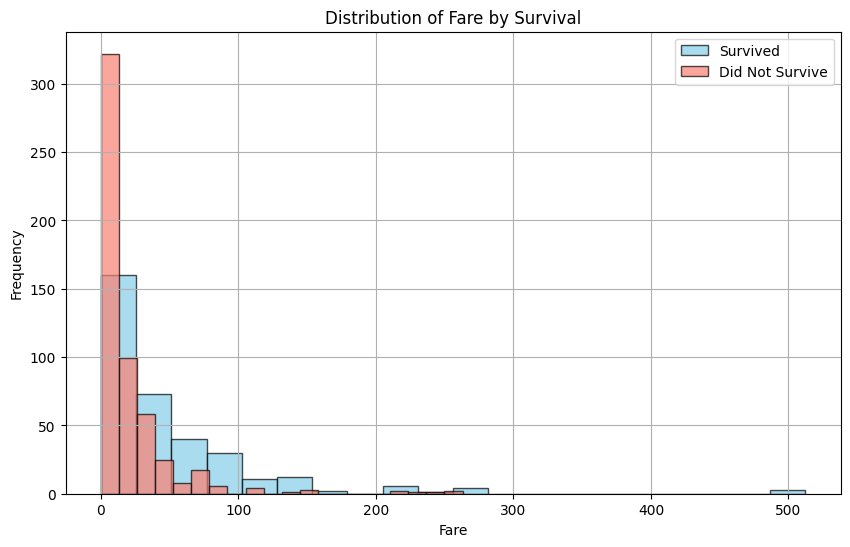

In [12]:
fare_survived = df[df['Survived'] == 1]['Fare'].dropna()
fare_not_survived = df[df['Survived'] == 0]['Fare'].dropna()

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create histograms for passengers who survived and those who did not
plt.hist(fare_survived, bins=20, color='skyblue', alpha=0.7, label='Survived', edgecolor='black')
plt.hist(fare_not_survived, bins=20, color='salmon', alpha=0.7, label='Did Not Survive', edgecolor='black')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,"(20, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,"(10, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,"(20, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,"(20, 30]"


In [14]:
def get_initials(dataframe,column_name):
    sub = []
    initials = ['Mrs.','Ms.','Mr.','Miss.','Master.','Lady.','Don.','Rev.','Dr.','Mme.','Major.','Sir.','Mlle.','Col.','Capt.','Countess.','Jonkheer.','Dona.']
    name = dataframe[column_name]
    for i in range(len(name)):
        split_names = name[i].split()
        for j in range(len(split_names)):
            if (split_names[j] in initials):
                sub.append(split_names[j])
    dataframe[column_name] = sub

In [15]:
get_initials(df,'Name')
df['Name'].value_counts()

Name
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Ms.            1
Mme.           1
Don.           1
Lady.          1
Sir.           1
Capt.          1
Countess.      1
Jonkheer.      1
Name: count, dtype: int64

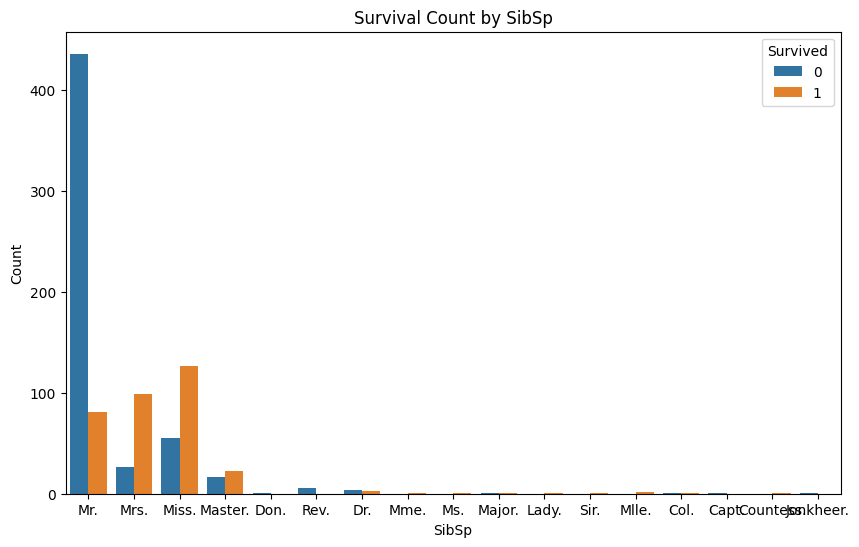

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
sns.countplot(x='Name',hue='Survived', data=df)
plt.title('SURVIVAL')

# Set labels and title
ax.set_xlabel('SibSp')
ax.set_ylabel('Count')
ax.set_title('Survival Count by SibSp')

# Show the plot
plt.show()

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,Mr.,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,Mrs.,female,38.000000,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,Miss.,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,Mrs.,female,35.000000,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,Mr.,male,35.000000,0,0,373450,8.0500,NaN,S,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev.,male,27.000000,0,0,211536,13.0000,NaN,S,"(20, 30]"
887,888,1,1,Miss.,female,19.000000,0,0,112053,30.0000,B42,S,"(10, 20]"
888,889,0,3,Miss.,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,"(20, 30]"
889,890,1,1,Mr.,male,26.000000,0,0,111369,30.0000,C148,C,"(20, 30]"


In [18]:
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Sex'] = le.fit_transform(df['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
df['Embarked'] = df['Embarked'].fillna('Q')
df['Embarked'] = le.fit_transform(df['Embarked'])

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,12,1,22.000000,1,0,A/5 21171,7.2500,NaN,2,"(20, 30]"
1,2,1,1,13,0,38.000000,1,0,PC 17599,71.2833,C85,0,"(30, 40]"
2,3,1,3,9,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,"(20, 30]"
3,4,1,1,13,0,35.000000,1,0,113803,53.1000,C123,2,"(30, 40]"
4,5,0,3,12,1,35.000000,0,0,373450,8.0500,NaN,2,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,15,1,27.000000,0,0,211536,13.0000,NaN,2,"(20, 30]"
887,888,1,1,9,0,19.000000,0,0,112053,30.0000,B42,2,"(10, 20]"
888,889,0,3,9,0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,"(20, 30]"
889,890,1,1,12,1,26.000000,0,0,111369,30.0000,C148,0,"(20, 30]"


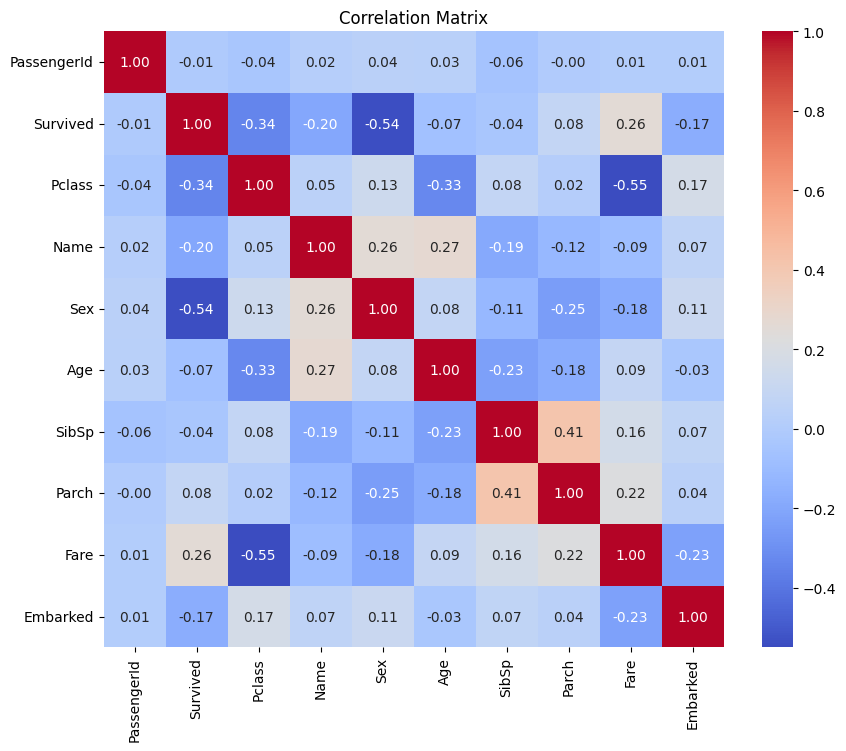

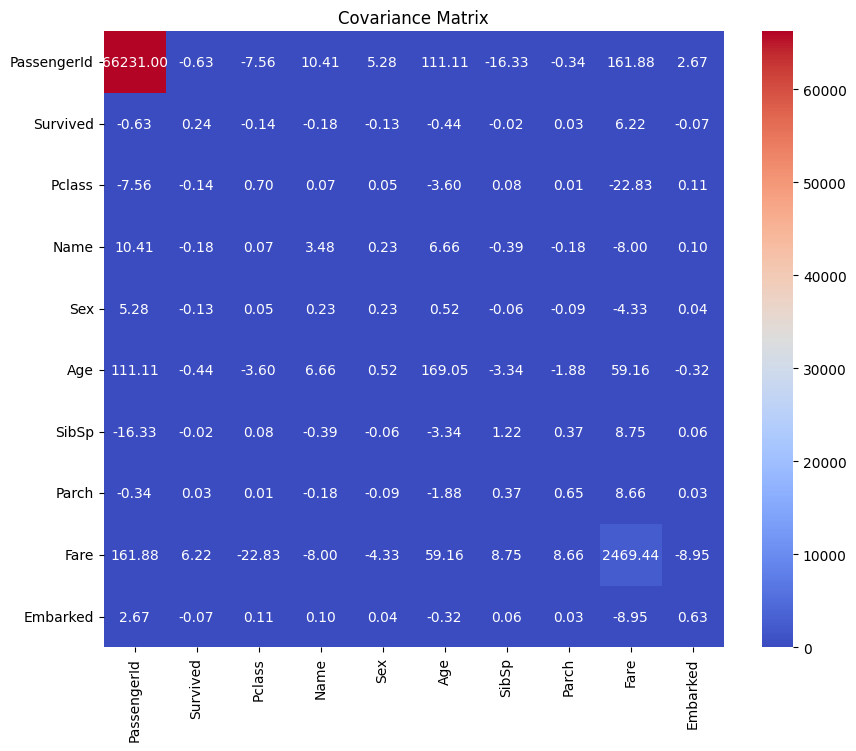

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].cov()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix')
plt.show()

In [21]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

df['Family'] = df['SibSp'] + df['Parch'] + 1
df['Alone'] = 0
df.loc[df['Family'] == 1, 'Alone'] = 1

In [22]:
training, testing = train_test_split(df, test_size=0.2, random_state=0)

In [23]:
cols = ['Pclass', 'Sex','Parch','SibSp']
tcols = np.append(['Survived'],cols)
df = training.loc[:,tcols].dropna()

X = df.loc[:,cols]
y = np.ravel(df.loc[:,['Survived']])

df_test = testing.loc[:,tcols].dropna()
X_test = df_test.loc[:,cols]
y_test = np.ravel(df_test.loc[:,['Survived']])

In [24]:
df

,Survived,Pclass,Sex,Parch,SibSp
140,0,3,0,2,0
439,0,2,1,0,0
817,0,2,1,1,1
378,0,3,1,0,0
491,0,3,1,0,0
...,...,...,...,...,...
835,1,1,0,1,1
192,1,3,0,0,1
629,0,3,1,0,0
559,1,3,0,0,1


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X, y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate the best estimator on the test set
best_accuracy = best_rf_clf.score(X_test, y_test)
print("Accuracy of Best Estimator:", round(best_accuracy * 100, 2))


Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Accuracy of Best Estimator: 81.01


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=k_fold)
clf.fit(X, y)
# Calculate the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Mean Accuracy:", round(mean_accuracy * 100, 2))
print("Standard Deviation of Accuracy:", round(std_accuracy * 100, 2))

Mean Accuracy: 78.79
Standard Deviation of Accuracy: 3.49


In [27]:
df = pd.read_csv('/kaggle/input/aaacopy-of-titanic/test.csv')

# Preprocess the test data
# Fill missing values in 'Age' column with median age
df.fillna({'Fare': df['Fare'].mean()}, inplace=True)

# Map 'Sex' column values to numeric
df['Name'] = le.fit_transform(df['Name'])
df['Sex'] = le.fit_transform(df['Sex'])
embarked = {0:'S',1:'C',2:'Q'}
df['Embarked'] = df['Embarked'].fillna('Q')
df['Embarked'] = le.fit_transform(df['Embarked'])
df.fillna({'Age': mean_age}, inplace=True)
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

df['Family'] = df['SibSp'] + df['Parch'] + 1
df['Alone'] = 0
df.loc[df['Family'] == 1, 'Alone'] = 1

# Select the same features as used in training
X_test = df[cols]


# Make predictions using the trained model
predictions = clf.predict(X_test)

# Create a DataFrame for the predictions
output = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': predictions})

# Save the predictions to a CSV file
output.to_csv('submission.csv', index=False)